In [205]:
#### Part 02 of learning KNN. Check knn101 for previous part ####
# Preparing an imbalance dataset of (Versicolor + Virginica) and only Setosa.
# For Setosa we will keep 0
# For Versicolor and Virginica we will keep 1

# Did Hyperparameter tunning for finding out the best k for the KNN algorithm.

In [624]:
import sys
print("Python version:", sys.version)

import sklearn
print("scikit-learn version:", sklearn.__version__)

import platform
print("Operating System:", platform.system())
print("OS version:", platform.version())
print("Processor:", platform.processor())

Python version: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 08:22:19) [Clang 14.0.6 ]
scikit-learn version: 1.5.1
Operating System: Darwin
OS version: Darwin Kernel Version 22.6.0: Wed Jul  5 22:21:53 PDT 2023; root:xnu-8796.141.3~6/RELEASE_ARM64_T6020
Processor: arm


In [626]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()

df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [628]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [630]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [654]:
# Preparing an imbalance dataset of (Versicolor + Virginica) and only Setosa.
# For Setosa we will keep 0
# For Versicolor and Virginica we will keep 1

# Split the data and create independent DataFrames
df_setosa = df[:50].copy()
df_versicolor = df[50:100].copy()
df_virginica = df[100:].copy()

df_versicolor_and_virginica = df[50:150].copy()
df_setosa_and_versicolor = df[:100].copy()

# Modify the 'target' column for Versicolor and Virginica to be 1.
df_versicolor_and_virginica['target'] = 1
df_versicolor_and_virginica['flower_name'] = "Versicolor and Virginica" 

df_combined = pd.concat([df_setosa, df_versicolor_and_virginica], ignore_index=True)
# Now we have df_combined, that has binary classifer of Setosa and (Versicolor and Virginica)

In [656]:
df_combined

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1,Versicolor and Virginica
146,6.3,2.5,5.0,1.9,1,Versicolor and Virginica
147,6.5,3.0,5.2,2.0,1,Versicolor and Virginica
148,6.2,3.4,5.4,2.3,1,Versicolor and Virginica


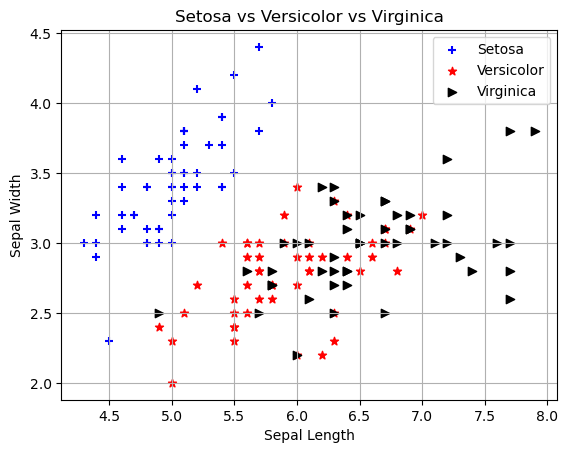

In [658]:
# Scatter plot for Setosa vs Versicolor
plt.scatter(df_setosa['sepal length (cm)'], df_setosa['sepal width (cm)'], color='blue', label='Setosa', marker = "+")
plt.scatter(df_versicolor['sepal length (cm)'], df_versicolor['sepal width (cm)'], color='red', label='Versicolor', marker = "*")
plt.scatter(df_virginica['sepal length (cm)'], df_virginica['sepal width (cm)'], color='black', label='Virginica', marker = ">")

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Setosa vs Versicolor vs Virginica')
plt.legend()
plt.grid()
plt.show()

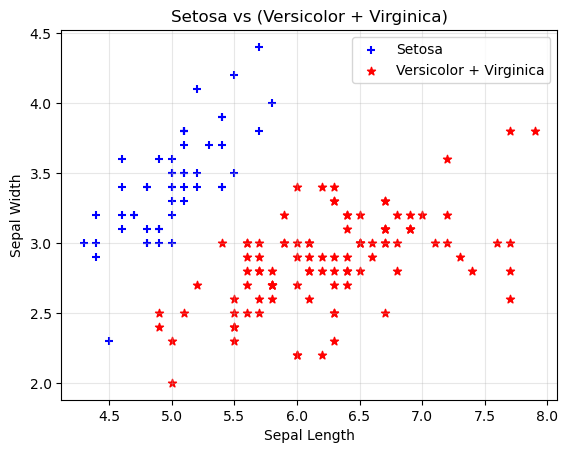

In [660]:
# Scatter plot for Setosa vs (Versicolor + Virginica)
plt.scatter(df_setosa['sepal length (cm)'], df_setosa['sepal width (cm)'], color='blue', label='Setosa', marker = "+")
plt.scatter(df_versicolor_and_virginica['sepal length (cm)'], df_versicolor_and_virginica['sepal width (cm)'], color='red', label='Versicolor + Virginica', marker = "*")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Setosa vs (Versicolor + Virginica)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [539]:
def calculateTSSFromPostiveAndNegative(true_positive, true_negative, false_positive, false_negative):
    number_of_positives = true_positive + false_negative
    number_of_negatives = true_negative + false_positive

    return ((true_positive * true_negative) - (false_positive * false_negative)) / (number_of_positives * number_of_negatives)

In [541]:
# Method to calculate, TSS
# TSS = ((TP * TN) - (FP * FN))/((TP + FN)*(TN+FP))
def calculateTSS(array):
    true_positive = array[0][0]
    false_positive = array[0][1]
    false_negative = array[1][0]
    true_negative = array[1][1]

    number_of_positives = true_positive + false_negative
    number_of_negatives = true_negative + false_positive

    return ((true_positive * true_negative) - (false_positive * false_negative)) / (number_of_positives * number_of_negatives)

In [574]:
# We have imbalanced dataset of Setosa vs (Versicolor + Virginica)
# First I will try without making any changes to this imbalanced data
# This method is used for Hypertunning the parameter as well

from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

def leave_one_out_validation(k_neighbors, df):

    # Leave-One-Out cross-validation
    loo = LeaveOneOut()
    
    # Aggregating TP, TN, FP, and FN.
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    
    accuracy = []
    
    X = df.drop(['target', 'flower_name'], axis='columns')
    Y = df['target']
    
    for train_index, test_index in loo.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
        
        knn = KNeighborsClassifier(n_neighbors = k_neighbors)
        knn.fit(X_train, Y_train)
        
        Y_pred = knn.predict(X_test)
    
        # Cannot computer TSS, because conf_matrix only accounts for one sample at a time for LOO, 
        # so, depending on true lable of test sample, one row or one column in confusion matrix can remain entirely zero,
        # So, the dividing by zeroo occurs in TSS 
        conf_matrix = confusion_matrix(Y_test, Y_pred, labels=knn.classes_)  # labels ensure consistency in TSS
    
        # print(conf_matrix)
        
        true_positive += conf_matrix[0][0]
        true_negative += conf_matrix[1][1]
        false_positive += conf_matrix[0][1]
        false_negative += conf_matrix[1][0]
        
        accuracy.append(knn.score(X_test, Y_test))
    
    tss = calculateTSSFromPostiveAndNegative(true_positive, true_negative, false_positive, false_negative)
    return tss
    
    # print("LOO test, Mean Accuracy for Versicolor vs Virginica: ", sum(accuracy) / len(accuracy))
    # print("LOO test, Mean TSS for imbalanced dataset of Setosa vs (Versicolor + Virginica) for k = " + str(k_neighbors) + " is: ", tss)

In [545]:
# LOO validation with no change in the imbalanced dataset
k = [1, 3, 5]
for i in k:
    tss = leave_one_out_validation(i, df_combined)
    print ("LOO test, Mean TSS for imbalanced dataset of Setosa vs (Versicolor + Virginica) for k = " + str(i) + " is: ", tss)

LOO test, Mean TSS for imbalanced dataset of Setosa vs (Versicolor + Virginica) for k = 1 is:  1.0
LOO test, Mean TSS for imbalanced dataset of Setosa vs (Versicolor + Virginica) for k = 3 is:  1.0
LOO test, Mean TSS for imbalanced dataset of Setosa vs (Versicolor + Virginica) for k = 5 is:  1.0


In [674]:
df_combined

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1,Versicolor and Virginica
146,6.3,2.5,5.0,1.9,1,Versicolor and Virginica
147,6.5,3.0,5.2,2.0,1,Versicolor and Virginica
148,6.2,3.4,5.4,2.3,1,Versicolor and Virginica


In [547]:
# Hyperparameter tunning
# Pick 70% for finding the best k, 20% for training the model and 10% for testing the model.

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

# Step 1: Split the dataset into 70% (Subset A) and 30% (Subset B)
X_subset_A, X_subset_B, y_subset_A, y_subset_B = train_test_split(df_combined, df_combined, train_size=0.7)

# Step 2: Further split Subset B into 20% training and 10% testing
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_subset_B, y_subset_B, train_size=2/3)

tss = []

k = [1, 3, 5]
for i in k:
    tss = leave_one_out_validation(i, X_subset_A)
    print ("LOO test, Mean TSS for imbalanced dataset of Setosa vs (Versicolor + Virginica) for k = " + str(i) + " is: ", tss)

# So the best k is either 1, 3 or 5. All of them are giving a perfect score. So, I will choose k = 3 for training the 20% of the data
# I will train on the 20% data that is X_train_B, y_train_B and remaining 10% for testing X_test_B, X_test_B

X_train_B = X_train_B.drop(['target', 'flower_name'], axis = 'columns')
y_train_B = y_train_B.target

X_test_B = X_test_B.drop(['target', 'flower_name'], axis = 'columns')
y_test_B = y_test_B.target

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_B, y_train_B)

Y_pred = knn.predict(X_test_B)
conf_matrix = confusion_matrix(y_test_B, Y_pred)   # confusion_matrix(truth, prediction)

print("TSS for k = 3 is: ", calculateTSS(conf_matrix))

LOO test, Mean TSS for imbalanced dataset of Setosa vs (Versicolor + Virginica) for k = 1 is:  1.0
LOO test, Mean TSS for imbalanced dataset of Setosa vs (Versicolor + Virginica) for k = 3 is:  1.0
LOO test, Mean TSS for imbalanced dataset of Setosa vs (Versicolor + Virginica) for k = 5 is:  1.0
TSS for k = 3 is:  1.0


In [742]:
# Hyperparameter tunning
# Pick 50% for finding the best k, 30% for training the model and 20% for testing the model.

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Step 1: Split the dataset into 50% (Subset A) and 50% (Subset B)
X_subset_A, X_subset_B, y_subset_A, y_subset_B = train_test_split(df_combined, df_combined, train_size=1/2)

# Step 2: Further split Subset B into 30% training and 20% testing
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_subset_B, y_subset_B, train_size=3/5)

k = [1, 3, 5]
for i in k:
    tss = leave_one_out_validation(i, X_subset_A)
    print ("LOO test, Mean TSS for imbalanced dataset of Setosa vs (Versicolor + Virginica) for k = " + str(i) + " is: ", tss)

# So the best k is either 1, 3 or 5. All of them are giving a perfect score. So, I will choose k = 3.
# I will train on the 30% data that is X_train_B, y_train_B and remaining 20% for testing X_test_B, X_test_B

X_train_B = X_train_B.drop(['target', 'flower_name'], axis = 'columns')
y_train_B = y_train_B.target

X_test_B = X_test_B.drop(['target', 'flower_name'], axis = 'columns')
y_test_B = y_test_B.target

# X = df_versicolor_and_virginica.drop(['target', 'flower_name'], axis = 'columns')
# Y = df_versicolor_and_virginica.target

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_B, y_train_B)

Y_pred = knn.predict(X_test_B)
conf_matrix = confusion_matrix(y_test_B, Y_pred)   # confusion_matrix(truth, prediction)

print("TSS for k = 3 is: ", calculateTSS(conf_matrix))

LOO test, Mean TSS for imbalanced dataset of Setosa vs (Versicolor + Virginica) for k = 1 is:  1.0
LOO test, Mean TSS for imbalanced dataset of Setosa vs (Versicolor + Virginica) for k = 3 is:  1.0
LOO test, Mean TSS for imbalanced dataset of Setosa vs (Versicolor + Virginica) for k = 5 is:  1.0
TSS for k = 3 is:  1.0


In [743]:
# Preparing an imbalance dataset of (Setosa + Versicolor) and only Virginica
# For Virginica we will keep 0
# For Setosa and Versicolor we will keep 1

# Split the data and create independent DataFrames
df_setosa = df[:50].copy()
df_versicolor = df[50:100].copy()
df_virginica = df[100:].copy()

df_setosa_and_versicolor = df[:100].copy()

# Modify the 'target' column for Setosa and Versicolor to be 1.
df_setosa_and_versicolor['target'] = 1
df_setosa_and_versicolor['flower_name'] = "Setosa and Versicolor" 

df_virginica['target'] = 0

df_combined_s_ve_and_vi = pd.concat([df_setosa_and_versicolor, df_virginica], ignore_index=True)
# Now we have df_combined, that has binary classifer of Setosa and (Versicolor and Virginica)

In [744]:
df_combined_s_ve_and_vi

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,1,Setosa and Versicolor
1,4.9,3.0,1.4,0.2,1,Setosa and Versicolor
2,4.7,3.2,1.3,0.2,1,Setosa and Versicolor
3,4.6,3.1,1.5,0.2,1,Setosa and Versicolor
4,5.0,3.6,1.4,0.2,1,Setosa and Versicolor
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,virginica
146,6.3,2.5,5.0,1.9,0,virginica
147,6.5,3.0,5.2,2.0,0,virginica
148,6.2,3.4,5.4,2.3,0,virginica


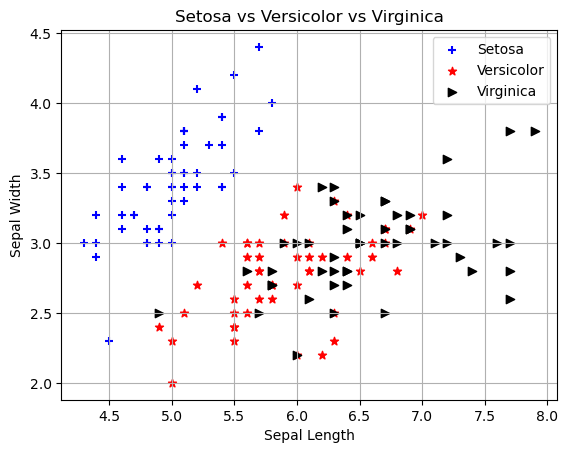

In [748]:
# Scatter plot for Setosa vs Versicolor
plt.scatter(df_setosa['sepal length (cm)'], df_setosa['sepal width (cm)'], color='blue', label='Setosa', marker = "+")
plt.scatter(df_versicolor['sepal length (cm)'], df_versicolor['sepal width (cm)'], color='red', label='Versicolor', marker = "*")
plt.scatter(df_virginica['sepal length (cm)'], df_virginica['sepal width (cm)'], color='black', label='Virginica', marker = ">")

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Setosa vs Versicolor vs Virginica')
plt.legend()
plt.grid()
plt.show()

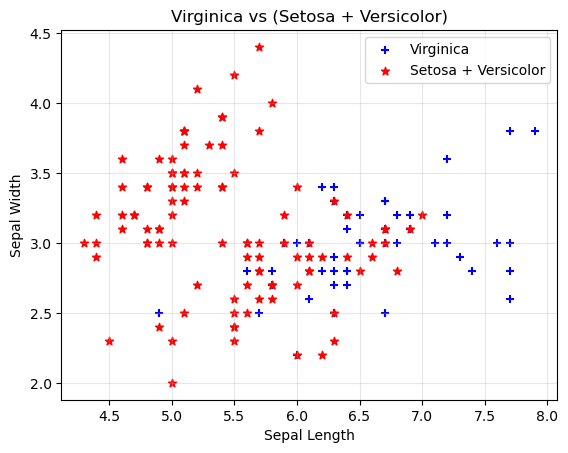

In [750]:
# Scatter plot for Virginica vs (Setosa + Versicolor)
plt.scatter(df_virginica['sepal length (cm)'], df_virginica['sepal width (cm)'], color='blue', label='Virginica', marker = "+")
plt.scatter(df_setosa_and_versicolor['sepal length (cm)'], df_setosa_and_versicolor['sepal width (cm)'], color='red', label='Setosa + Versicolor', marker = "*")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Virginica vs (Setosa + Versicolor)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [938]:
# LOO validation with no change in the imbalanced dataset
k = [1, 3, 5]
for i in k:
    tss = leave_one_out_validation(i, df_combined_s_ve_and_vi)
    print ("LOO test, Mean TSS for imbalanced dataset of Virginica vs (Setosa + Versicolor) for k = " + str(i) + " is: ", tss)

LOO test, Mean TSS for imbalanced dataset of Virginica vs (Setosa + Versicolor) for k = 1 is:  0.91
LOO test, Mean TSS for imbalanced dataset of Virginica vs (Setosa + Versicolor) for k = 3 is:  0.91
LOO test, Mean TSS for imbalanced dataset of Virginica vs (Setosa + Versicolor) for k = 5 is:  0.9209744503862151


In [885]:
# Hyperparameter tunning for Virginica vs (Setosa + Versicolor)
# Pick 70% for finding the best k, 20% for training the model and 10% for testing the model.

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

# Step 1: Split the dataset into 70% (Subset A) and 30% (Subset B)
X_subset_A, X_subset_B, y_subset_A, y_subset_B = train_test_split(df_combined_s_ve_and_vi, df_combined_s_ve_and_vi, train_size=0.7)

# Aggregating TP, TN, FP, and FN.
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

k = [1, 3, 5]
best_k = 1;
lowest_tss = 0;
for i in k:
    tss = leave_one_out_validation(i, X_subset_A)
    if (tss > lowest_tss):
        best_k = i
        lowest_tss = tss
    print ("LOO test, Mean TSS for imbalanced dataset of Setosa vs (Versicolor + Virginica) for k = " + str(i) + " is: ", tss)

print(f"The best k with highest TSS is: {best_k}")

X = X_subset_B.drop(['target', 'flower_name'], axis = 'columns')
Y = y_subset_B.target

# Here use k-fold testing
folds = StratifiedKFold(n_splits = 3)

for train_index, test_index in folds.split(X, Y):
    # Use .iloc for numerical indexing
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    knn = KNeighborsClassifier(n_neighbors = best_k)
    knn.fit(X_train, Y_train)
    
    Y_pred = knn.predict(X_test)
    conf_matrix = confusion_matrix(Y_test, Y_pred)   # confusion_matrix(truth, prediction)

    # print(conf_matrix)

    true_positive += conf_matrix[0][0]
    true_negative += conf_matrix[1][1]
    false_positive += conf_matrix[0][1]
    false_negative += conf_matrix[1][0]
    
tss = calculateTSSFromPostiveAndNegative(true_positive, true_negative, false_positive, false_negative)

print (f"Mean TSS for Virginica vs (Setosa + Versicolor) for 70/20/10 split with the best k = {best_k} is: ", tss)

LOO test, Mean TSS for imbalanced dataset of Setosa vs (Versicolor + Virginica) for k = 1 is:  0.9101027397260274
LOO test, Mean TSS for imbalanced dataset of Setosa vs (Versicolor + Virginica) for k = 3 is:  0.9101027397260274
LOO test, Mean TSS for imbalanced dataset of Setosa vs (Versicolor + Virginica) for k = 5 is:  0.9101027397260274
The best k with highest TSS is: 1
Mean TSS for Virginica vs (Setosa + Versicolor) for 70/20/10 split with the best k = 1 is:  1.0


In [890]:
# Hyperparameter tunning for Virginica vs (Setosa + Versicolor)
# Pick 50% for finding the best k, 30% for training the model and 20% for testing the model.

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

# Step 1: Split the dataset into 50% (Subset A) and 50% (Subset B)
X_subset_A, X_subset_B, y_subset_A, y_subset_B = train_test_split(df_combined_s_ve_and_vi, df_combined_s_ve_and_vi, train_size=0.5)

# Aggregating TP, TN, FP, and FN.
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

k = [1, 3, 5]
best_k = 1;
lowest_tss = 0;
for i in k:
    tss = leave_one_out_validation(i, X_subset_A)
    if (tss > lowest_tss):
        best_k = i
        lowest_tss = tss
    print ("LOO test, Mean TSS for imbalanced dataset of Setosa vs (Versicolor + Virginica) for k = " + str(i) + " is: ", tss)

print(f"The best k with highest TSS is: {best_k}")

X = X_subset_B.drop(['target', 'flower_name'], axis = 'columns')
Y = y_subset_B.target

# Here use k-fold testing
folds = StratifiedKFold(n_splits = 3)

for train_index, test_index in folds.split(X, Y):
    # Use .iloc for numerical indexing
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    knn = KNeighborsClassifier(n_neighbors = best_k)
    knn.fit(X_train, Y_train)
    
    Y_pred = knn.predict(X_test)
    conf_matrix = confusion_matrix(Y_test, Y_pred)   # confusion_matrix(truth, prediction)

    # print(conf_matrix)

    true_positive += conf_matrix[0][0]
    true_negative += conf_matrix[1][1]
    false_positive += conf_matrix[0][1]
    false_negative += conf_matrix[1][0]
    
tss = calculateTSSFromPostiveAndNegative(true_positive, true_negative, false_positive, false_negative)

print (f"Mean TSS for Virginica vs (Setosa + Versicolor) for 50/30/20 split with the best k = {best_k} is: ", tss)

LOO test, Mean TSS for imbalanced dataset of Setosa vs (Versicolor + Virginica) for k = 1 is:  0.9666666666666667
LOO test, Mean TSS for imbalanced dataset of Setosa vs (Versicolor + Virginica) for k = 3 is:  0.9036016949152542
LOO test, Mean TSS for imbalanced dataset of Setosa vs (Versicolor + Virginica) for k = 5 is:  0.9036016949152542
The best k with highest TSS is: 1
Mean TSS for Virginica vs (Setosa + Versicolor) for 50/30/20 split with the best k = 1 is:  0.8892857142857142


In [930]:
# Run the program multiple times,

# Hyperparameter tunning for Virginica vs (Setosa + Versicolor)
# Pick 50% for finding the best k, 30% for training the model and 20% for testing the model.

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

def split_50_30_20():

    # Step 1: Split the dataset into 50% (Subset A) and 50% (Subset B)
    X_subset_A, X_subset_B, y_subset_A, y_subset_B = train_test_split(df_combined_s_ve_and_vi, df_combined_s_ve_and_vi, train_size=0.5)
    
    # Aggregating TP, TN, FP, and FN.
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    
    k = [1, 3, 5]
    best_k = 1;
    lowest_tss = 0;
    for i in k:
        tss = leave_one_out_validation(i, X_subset_A)
        if (tss > lowest_tss):
            best_k = i
            lowest_tss = tss
        print ("LOO test, Mean TSS for imbalanced dataset of Setosa vs (Versicolor + Virginica) for k = " + str(i) + " is: ", tss)
    
    print(f"The best k with highest TSS is: {best_k}")
    
    X = X_subset_B.drop(['target', 'flower_name'], axis = 'columns')
    Y = y_subset_B.target
    
    # Here use k-fold testing
    folds = StratifiedKFold(n_splits = 3)
    
    for train_index, test_index in folds.split(X, Y):
        # Use .iloc for numerical indexing
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
        
        knn = KNeighborsClassifier(n_neighbors = best_k)
        knn.fit(X_train, Y_train)
        
        Y_pred = knn.predict(X_test)
        conf_matrix = confusion_matrix(Y_test, Y_pred)   # confusion_matrix(truth, prediction)
    
        # print(conf_matrix)
    
        true_positive += conf_matrix[0][0]
        true_negative += conf_matrix[1][1]
        false_positive += conf_matrix[0][1]
        false_negative += conf_matrix[1][0]
        
    tss = calculateTSSFromPostiveAndNegative(true_positive, true_negative, false_positive, false_negative)
    
    print (f"Mean TSS for best k = {best_k}: ", tss)
    print()
    return tss

In [932]:
# Run the program multiple times,

# Hyperparameter tunning
# Pick 70% for finding the best k, 20% for training the model and 10% for testing the model.

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

def split_70_20_10():
    # Step 1: Split the dataset into 70% (Subset A) and 30% (Subset B)
    X_subset_A, X_subset_B, y_subset_A, y_subset_B = train_test_split(df_combined_s_ve_and_vi, df_combined_s_ve_and_vi, train_size=0.7)
    
    # Aggregating TP, TN, FP, and FN.
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    
    k = [1, 3, 5]
    best_k = 1;
    lowest_tss = 0;
    for i in k:
        tss = leave_one_out_validation(i, X_subset_A)
        if (tss > lowest_tss):
            best_k = i
            lowest_tss = tss
        print ("LOO test, Mean TSS for imbalanced dataset of Setosa vs (Versicolor + Virginica) for k = " + str(i) + " is: ", tss)
    
    print(f"The best k with highest TSS is: {best_k}")
    
    X = X_subset_B.drop(['target', 'flower_name'], axis = 'columns')
    Y = y_subset_B.target
    
    # Here use k-fold testing
    folds = StratifiedKFold(n_splits = 3)
    
    for train_index, test_index in folds.split(X, Y):
        # Use .iloc for numerical indexing
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
        
        knn = KNeighborsClassifier(n_neighbors = best_k)
        knn.fit(X_train, Y_train)
        
        Y_pred = knn.predict(X_test)
        conf_matrix = confusion_matrix(Y_test, Y_pred)   # confusion_matrix(truth, prediction)
    
        # print(conf_matrix)
    
        true_positive += conf_matrix[0][0]
        true_negative += conf_matrix[1][1]
        false_positive += conf_matrix[0][1]
        false_negative += conf_matrix[1][0]
        
    tss = calculateTSSFromPostiveAndNegative(true_positive, true_negative, false_positive, false_negative)
    
    print (f"Mean TSS for best k = {best_k}: ", tss)
    print()
    return tss

In [934]:
N = 5

print ("******** FOR 70/20/10 split *********")

tss_100_run_split_70_20_10 = []
for i in range(N):
    tss_100_run_split_70_20_10.append(split_70_20_10())

avg_split_70_20_10 = sum(tss_100_run_split_70_20_10) / len(tss_100_run_split_70_20_10)
print()
print (f"The Mean TSS after running 70-20-10 split {N} times is: {avg_split_70_20_10}")

print()
print()
print ("******** FOR 50/30/20 split *********")
print()

tss_100_run_split_50_30_20 = []
for i in range(N):
    tss_100_run_split_50_30_20.append(split_50_30_20())

avg_split_50_30_20 = sum(tss_100_run_split_50_30_20) / len(tss_100_run_split_50_30_20)
print()
print (f"The Mean TSS after running 50-30-20 split {N} times is: {avg_split_50_30_20}")


******** FOR 70/20/10 split *********
LOO test, Mean TSS for imbalanced dataset of Setosa vs (Versicolor + Virginica) for k = 1 is:  0.8519813519813519
LOO test, Mean TSS for imbalanced dataset of Setosa vs (Versicolor + Virginica) for k = 3 is:  0.8519813519813519
LOO test, Mean TSS for imbalanced dataset of Setosa vs (Versicolor + Virginica) for k = 5 is:  0.8519813519813519
The best k with highest TSS is: 1
Mean TSS for best k = 1:  1.0

LOO test, Mean TSS for imbalanced dataset of Setosa vs (Versicolor + Virginica) for k = 1 is:  0.8895071542130366
LOO test, Mean TSS for imbalanced dataset of Setosa vs (Versicolor + Virginica) for k = 3 is:  0.8895071542130366
LOO test, Mean TSS for imbalanced dataset of Setosa vs (Versicolor + Virginica) for k = 5 is:  0.906127258444619
The best k with highest TSS is: 5
Mean TSS for best k = 5:  1.0

LOO test, Mean TSS for imbalanced dataset of Setosa vs (Versicolor + Virginica) for k = 1 is:  0.8989229494614748
LOO test, Mean TSS for imbalanced d